In [2]:
import pandas as pd
import numpy 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np
import pickle
from matplotlib.pyplot import figure

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
#cit=pd.read_csv("YeastbothresultsCIT10k.csv")
cit1=pd.read_csv("YeastbothresultsCIT.csv")

In [34]:
cit1

,p_cit,p_TL,p_TG,p_GL,p_Lind,GroundTruth
0,0.999997,0.526752,1.451417e-42,3.025060e-13,0.999997,1
1,0.770998,0.770998,3.154449e-05,4.327071e-06,0.654044,1
2,0.160258,0.013723,1.478439e-01,2.326003e-04,0.160258,1
3,0.864296,0.304704,8.642960e-01,2.939863e-71,0.735532,1
4,0.999992,0.797223,4.165822e-12,2.051547e-34,0.999992,1
...,...,...,...,...,...,...
1995,1.000000,0.044756,4.255630e-08,3.497283e-07,1.000000,0
1996,0.923909,0.116567,1.282423e-01,5.183201e-60,0.923909,0
1997,1.000000,0.246241,1.240799e-121,4.313804e-87,1.000000,0
1998,1.000000,0.767710,1.409244e-20,9.823368e-59,1.000000,0


In [79]:
#nlmr=pd.read_csv("YeastbothresultsOurmethod10k.csv")
nlmr1=pd.read_csv("YeastbothresultsOurmethod.csv")

In [80]:
nlmr1.columns

Index(['p_cit', 'p_LA', 'p_LB', 'diff_test', 'GroundTruth'], dtype='object')

In [82]:
nlmr1

,GroundTruth,p_L->A,p_L->B,"diff(B|A,B|A,L)"
0,1,0.01,0.66,0.40
1,1,0.00,0.97,0.13
2,1,0.00,0.43,0.79
3,1,0.01,0.00,0.05
4,1,0.00,0.79,0.47
...,...,...,...,...
1995,0,0.00,0.45,0.99
1996,0,0.00,0.35,0.00
1997,0,0.00,0.27,0.79
1998,0,0.00,0.05,0.84


In [83]:
nlmr1.columns=['GroundTruth','p_LA','p_LB','diff_test']


In [85]:
nlmr1=nlmr1[['p_LA','p_LB','diff_test','GroundTruth']]

In [88]:
nlmr1

,p_LA,p_LB,diff_test,GroundTruth,p_cit
0,0.01,0.66,0.40,1,0.66
1,0.00,0.97,0.13,1,0.97
2,0.00,0.43,0.79,1,0.79
3,0.01,0.00,0.05,1,0.05
4,0.00,0.79,0.47,1,0.79
...,...,...,...,...,...
1995,0.00,0.45,0.99,0,0.99
1996,0.00,0.35,0.00,0,0.35
1997,0.00,0.27,0.79,0,0.79
1998,0.00,0.05,0.84,0,0.84


In [87]:
nlmr1['p_cit'] = nlmr1.apply(lambda row: max(row['p_LA'], row['p_LB'],row['diff_test']), axis=1)

/tmp/ipykernel_616947/1053998797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlmr1['p_cit'] = nlmr1.apply(lambda row: max(row['p_LA'], row['p_LB'],row['diff_test']), axis=1)


In [89]:

nlmr1=nlmr[['p_cit','p_LA','p_LB','diff_test','GroundTruth']]

In [90]:
nlmr1

,p_cit,p_LA,p_LB,diff_test,GroundTruth
0,0.40,0.00,0.10,0.40,1
1,0.15,0.00,0.15,0.11,1
2,0.03,0.00,0.02,0.03,1
3,0.55,0.00,0.55,0.38,1
4,0.69,0.00,0.05,0.69,1
...,...,...,...,...,...
19995,0.86,0.00,0.10,0.86,0
19996,0.45,0.00,0.36,0.45,0
19997,0.79,0.01,0.48,0.79,0
19998,0.32,0.00,0.10,0.32,0


In [60]:
#cit=cit.sort_values('p_cit')
cit1=cit1.sort_values('p_cit')

In [91]:
#nlmr=nlmr.sort_values('p_cit')
nlmr1=nlmr1.sort_values('p_cit')

In [164]:
nlmr

,p_cit,p_LA,p_LB,diff_test,GroundTruth
5925,0.0,0.0,0.00,0.0,1
3508,0.0,0.0,0.00,0.0,1
14152,0.0,0.0,0.00,0.0,0
6438,0.0,0.0,0.00,0.0,1
3284,0.0,0.0,0.00,0.0,1
...,...,...,...,...,...
2219,1.0,0.0,0.54,1.0,1
2218,1.0,0.0,0.74,1.0,1
2217,1.0,0.0,0.51,1.0,1
12454,1.0,0.0,0.65,1.0,0


In [147]:
top200=nlmr.head(n=200)

In [38]:
true_labels=top200['GroundTruth']
pred_labels=top200['call']

In [34]:
confusion_matrix=metrics.confusion_matrix(top200['GroundTruth'],top200['call'])

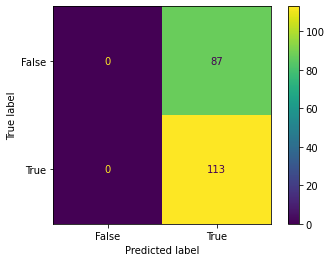

In [37]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [105]:
#taking the unique values of the final p values 
#uniquevalues=top200.p_cit.unique()

In [62]:
def compute_table(df,cutoff_range):
    dic={'cutoff':[],'TP':[],'TN':[],'FP':[],'FN':[],'Precision':[],'Recall':[]}

    #cutoff_range=[0.01,0.05,0.10,0.2]
    for cutoff in cutoff_range:
        df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
        true_labels=df['GroundTruth']
        pred_labels=df['call']

        TP = np.sum(np.logical_and(pred_labels == 1, true_labels == 1))

        # True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
        TN = np.sum(np.logical_and(pred_labels == 0, true_labels == 0))

        # False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
        FP = np.sum(np.logical_and(pred_labels == 1, true_labels == 0))

        # False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
        FN = np.sum(np.logical_and(pred_labels == 0, true_labels == 1))
        
        #Precision
        P= TP/(TP+FP)
        #Recall
        R= TP/(TP+FN)
        dic['cutoff'].append(cutoff)
        dic['TP'].append(TP)
        dic['TN'].append(TN)
        dic['FP'].append(FP)
        dic['FN'].append(FN)
        dic['Precision'].append(P)
        dic['Recall'].append(R)
    a=pd.DataFrame(dic)
    return a
    

In [63]:
def calculate_aupr(precision,recall):
    zipped=zip(precision,recall)
    z=sorted(zipped, key = lambda t: t[1])
    precision,recall=zip(*z)
    return metrics.auc(recall,precision)

In [64]:
def computefortopk(data,k):
    
    topk=data.head(n= 20000*k)
    uniquevalues=topk.p_cit.unique()
    table=compute_table(topk,uniquevalues)
    aupr=calculate_aupr(table['Precision'],table['Recall'])
    return aupr

In [65]:
def computefortopk_range(data,values):
    aupr_range=[]
    for i in values:
        aupr_range.append(computefortopk(data,i))
    return aupr_range

In [66]:
top_k=[0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [201]:
with open('aupr_nlmr.pkl', 'wb') as file:
      
    pickle.dump(aupr_nlmr, file)
file.close()

In [202]:
with open('aupr_cit.pkl', 'wb') as file:
      
    pickle.dump(aupr_cit, file)
file.close()

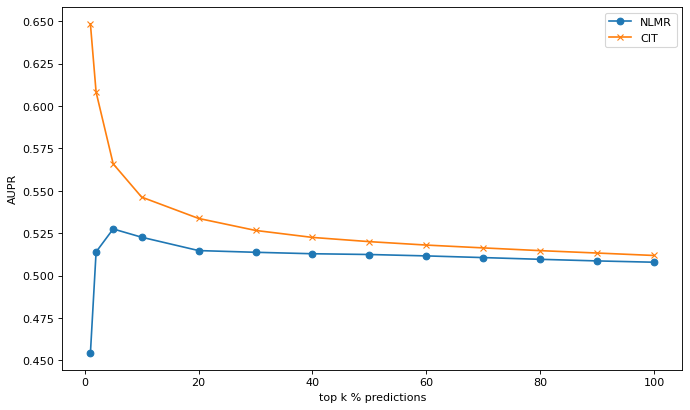

In [203]:
figure(figsize=(10, 6), dpi=80)
plt.plot([i*100 for i in top_k],aupr_nlmr,marker='o',label="NLMR")

plt.plot([i*100 for i in top_k],aupr_cit,marker='x',label="CIT")#plt.plot(aupr_cit,top_k)
plt.xlabel("top k % predictions")
plt.ylabel("AUPR")
#plt.xticks([i*100 for i in top_k],rotation=90)
plt.legend()
plt.show()

In [67]:
aupr_nlmr=computefortopk_range(nlmr,[1])

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [92]:
topk=nlmr1.head(n= 20000)
uniquevalues=topk.p_cit.unique()
table_nlmr=compute_table(topk,uniquevalues)

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [24]:
with open('PRtable_nlmr_full.pkl', 'wb') as file:
      
    pickle.dump(table_nlmr, file)
file.close()

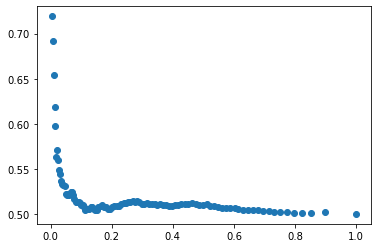

In [93]:
plt.scatter(table_nlmr['Recall'],table_nlmr['Precision'])

In [200]:
aupr_cit=computefortopk_range(cit,top_k)

In [94]:
topk=cit1.head(n= 20000)
uniquevalues=topk.p_cit.unique()
table_cit=compute_table(topk,uniquevalues)

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call']=df.apply (lambda row: 1 if row[0] <=cutoff   else 0, axis=1)
/tmp/ipykernel_616947/1969331447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [25]:
with open('PRtable_cit_full.pkl', 'wb') as file:
      
    pickle.dump(table_cit, file)
file.close()

Text(0.5, 1.0, 'Precision-Recall Curve for Yeast1k data')

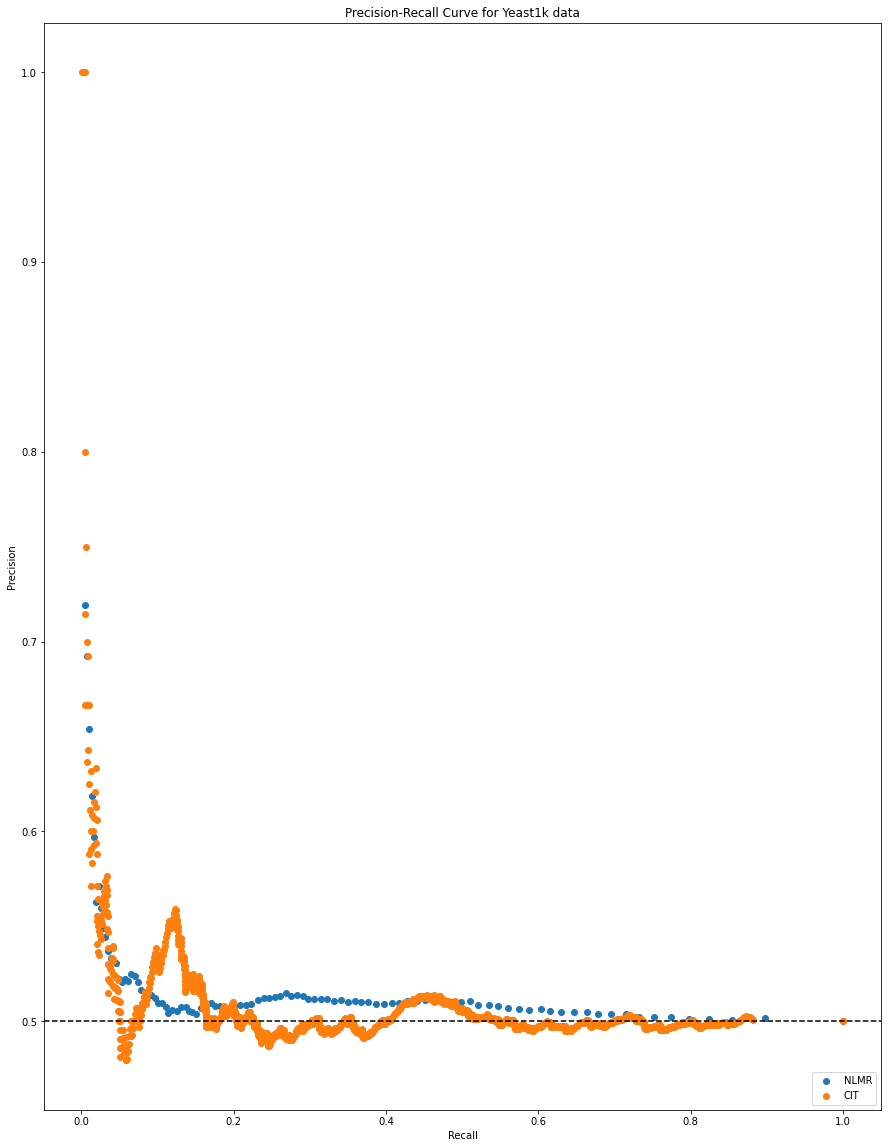

In [97]:
plt.figure(figsize=(15,20))
plt.scatter(table_nlmr['Recall'],table_nlmr['Precision'],label="NLMR")
plt.scatter(table_cit['Recall'],table_cit['Precision'],label="CIT")

plt.axhline(y=0.5, color='k', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Yeast1k data")